# Exploratory Data Analysis
### ACE Satellite Mission Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import time

In [3]:
# Set Seaborn style and color palette
sns.set_style("darkgrid")
sns.set_palette("Pastel1")

In [4]:
#Loading csv files 
epam_data = pd.read_csv("/data/workspace_files/ACE_Data/2024-04-17_ace_master_epam_1hr.csv", sep=',')
loc_data = pd.read_csv("/data/workspace_files/ACE_Data/2024-04-17_ace_master_loc_1hr.csv", sep=',')
mag_data = pd.read_csv("/data/workspace_files/ACE_Data/2024-04-17_ace_master_mag_1hr.csv", sep=',')
sis_data = pd.read_csv("/data/workspace_files/ACE_Data/2024-04-17_ace_master_sis_1hr.csv", sep=',')
swepam_data = pd.read_csv("/data/workspace_files/ACE_Data/2024-04-17_ace_master_swepam_1hr.csv", sep=',')

In [5]:
#aggregating data into single dataframe
master_df=loc_data.merge(epam_data, 
                         how='left', 
                         on=["Year","Month","Day","HHMM","Julian_Day","Seconds_OTD"]
                         ).merge(mag_data, 
                         how='left', 
                         on=["Year","Month","Day","HHMM","Julian_Day","Seconds_OTD"]
                         ).merge(sis_data, 
                         how='left', 
                         on=["Year","Month","Day","HHMM","Julian_Day","Seconds_OTD"]
                         ).merge(swepam_data, 
                         how='left', 
                         on=["Year","Month","Day","HHMM","Julian_Day","Seconds_OTD"]
                         )

#Filter out bad data (Status index == 1-9)
master_clean = master_df[(master_df["Status_E"] == 0) & (master_df["Status_P"] == 0) & (master_df["Status_Mag"] == 0) & (master_df["Status_PF_Low"] == 0) & (master_df["Status_PF_High"] == 0) & (master_df["Status_SW"] == 0)]

#Dropping Columns no longer needed
master_clean = master_clean.drop(columns=["Status_E","Status_P","Status_Mag","Status_PF_Low", "Status_PF_High","Status_SW","HHMM","Julian_Day"])

#create timestamp column
master_clean["gmt"]= pd.to_datetime(master_clean["Seconds_OTD"].astype('str'), unit='s').dt.strftime("%H:%M:%S")
master_clean["timestamp"]=pd.to_datetime(master_clean['Year'].astype(str) + "-" + master_clean['Month'].astype(str)+ "-" + master_clean['Day'].astype(str)+" "+ master_clean['gmt'].astype(str), format='%Y-%m-%d %H:%M:%S')


In [6]:
master_clean.to_csv('/data/workspace_files/'+ str(date.today()) + '_ace_master_clean_1hr.csv', index=False)

## Exploration

In [7]:
print(f"Shape: {master_clean.shape}")
master_clean.info()

Shape: (171708, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 171708 entries, 0 to 207866
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Year            171708 non-null  int64         
 1   Month           171708 non-null  int64         
 2   Day             171708 non-null  int64         
 3   Seconds_OTD     171708 non-null  int64         
 4   X               171708 non-null  float64       
 5   Y               171708 non-null  float64       
 6   Z               171708 non-null  float64       
 7   E_38-53         171708 non-null  float64       
 8   E_175-315       171708 non-null  float64       
 9   P_47-65         171708 non-null  float64       
 10  P_112-187       171708 non-null  float64       
 11  P_310-580       171708 non-null  float64       
 12  P_761-1220      171708 non-null  float64       
 13  P_1060-1910     171708 non-null  float64       
 14  Anis_Index      

In [8]:
# investigate missing values
print(master_clean.isna().sum())

Year               0
Month              0
Day                0
Seconds_OTD        0
X                  0
Y                  0
Z                  0
E_38-53            0
E_175-315          0
P_47-65            0
P_112-187          0
P_310-580          0
P_761-1220         0
P_1060-1910        0
Anis_Index        16
Bx                 0
By                 0
Bz                 0
Bt                 0
Lat                0
Long               0
>10_MeV            0
>30_MeV            0
Proton_Density     0
Bulk_Speed         0
Ion_Temp           0
gmt                0
timestamp          0
dtype: int64


In [22]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="timestamp", y="Anis_Index"), data=master_clean, sampling="none", color="#1100FF", fill="#1100FF", stat="identity") + \
ggtitle("Anisotropy Index (August 2000 - Present)")  +\
 scale_y_continuous()

generateStaticHtmlPage() - Exception: Figure spec kind is not defined.

Anisotropy index is no longer calculated after October 2011 (indicated as missing value -1.00 in SWPC README file about the data). This feature will be dropped due to missing data for over half of the observations. The magnitude of missing data values were not highlighted in first data cleaning process since the Anisotropy Index does not have a Status Index to indicate bad data like the other features in the data set. 

In [13]:
#Dropping Anis_Index Feature
master_clean = master_clean.drop(columns=["Anis_Index"])

In [14]:
# proportion of dataset that contains unique values
(master_clean.nunique()/len(master_clean)*100).sort_values(ascending=False)

timestamp 99.982528
P_1060-1910 3.569432
P_761-1220 3.368509
Bulk_Speed 3.286393
P_310-580 3.100030
P_112-187 2.986465
E_175-315 2.968411
E_38-53 2.948610
P_47-65 2.860670
Long 2.097165
%gt;10_MeV 1.710462
%gt;30_MeV 1.409369
Lat 1.037226
Ion_Temp 0.944627
Y 0.490367
Z 0.302257
Bz 0.295269
By 0.287698
Proton_Density 0.281291
Bx 0.246348
Bt 0.218976
X 0.196263
Day 0.018054
Year 0.014560
Seconds_OTD 0.013977
gmt 0.013977
Month 0.006989
dtype: float64

In [17]:
master_clean.describe()

,Year,Month,Day,Seconds_OTD,X,Y,Z,E_38-53,E_175-315,P_47-65,...,By,Bz,Bt,Lat,Long,>10_MeV,>30_MeV,Proton_Density,Bulk_Speed,Ion_Temp
count,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,1.717080e+05,1.717080e+05,1.717080e+05,...,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,171708.000000,1.717080e+05
mean,2010.974725,6.547849,15.689036,41675.176462,179.973366,-43.000991,-43.115219,1.524997e+04,7.219580e+02,7.350756e+03,...,-0.058819,-0.007395,5.024507,0.275470,201.428456,26.054572,10.488723,3.598917,428.127845,9.829107e+04
std,6.691077,3.436933,8.802172,24439.391154,250.256985,204.731160,203.468707,1.933295e+05,2.577459e+04,1.061274e+05,...,3.577557,3.055718,2.963650,31.956802,96.216916,416.606885,211.227852,3.597648,118.464742,8.795422e+04
min,2000.000000,1.000000,1.000000,0.000000,-999.900000,-999.900000,-999.900000,0.000000e+00,-1.000000e+05,-1.000000e+05,...,-60.800000,-59.300000,0.100000,-89.700000,0.000000,0.195000,0.120000,0.000000,-9999.900000,-1.000000e+05
25%,2005.000000,4.000000,8.000000,21600.000000,224.200000,-31.200000,-18.500000,5.090000e+02,2.030000e+01,9.710000e+02,...,-2.300000,-1.500000,3.200000,-21.600000,130.800000,1.180000,0.798000,1.500000,354.800000,4.100000e+04
50%,2010.000000,7.000000,16.000000,43200.000000,231.600000,-3.000000,-2.000000,7.950000e+02,2.620000e+01,1.640000e+03,...,-0.100000,0.000000,4.400000,-0.100000,184.200000,1.710000,1.140000,2.700000,406.400000,7.170000e+04
75%,2016.000000,10.000000,23.000000,61200.000000,241.100000,27.500000,16.200000,1.550000e+03,3.150000e+01,3.090000e+03,...,2.200000,1.500000,6.100000,22.000000,293.900000,2.240000,1.510000,4.500000,480.800000,1.280000e+05
max,2024.000000,12.000000,31.000000,82800.000000,250.000000,42.100000,25.700000,1.190000e+07,6.240000e+06,2.190000e+07,...,37.200000,46.600000,70.900000,89.600000,360.000000,12300.000000,7490.000000,119.400000,1196.400000,1.830000e+06


## Univariate Analysis

In [18]:
# Identify numerical columns
ACE_NUMERICAL_COLUMNS = master_clean.select_dtypes(include=["int64", "float64"]).columns

Index(['Year', 'Month', 'Day', 'Seconds_OTD', 'X', 'Y', 'Z', 'E_38-53',
       'E_175-315', 'P_47-65', 'P_112-187', 'P_310-580', 'P_761-1220',
       'P_1060-1910', 'Bx', 'By', 'Bz', 'Bt', 'Lat', 'Long', '>10_MeV',
       '>30_MeV', 'Proton_Density', 'Bulk_Speed', 'Ion_Temp'],
      dtype='object')

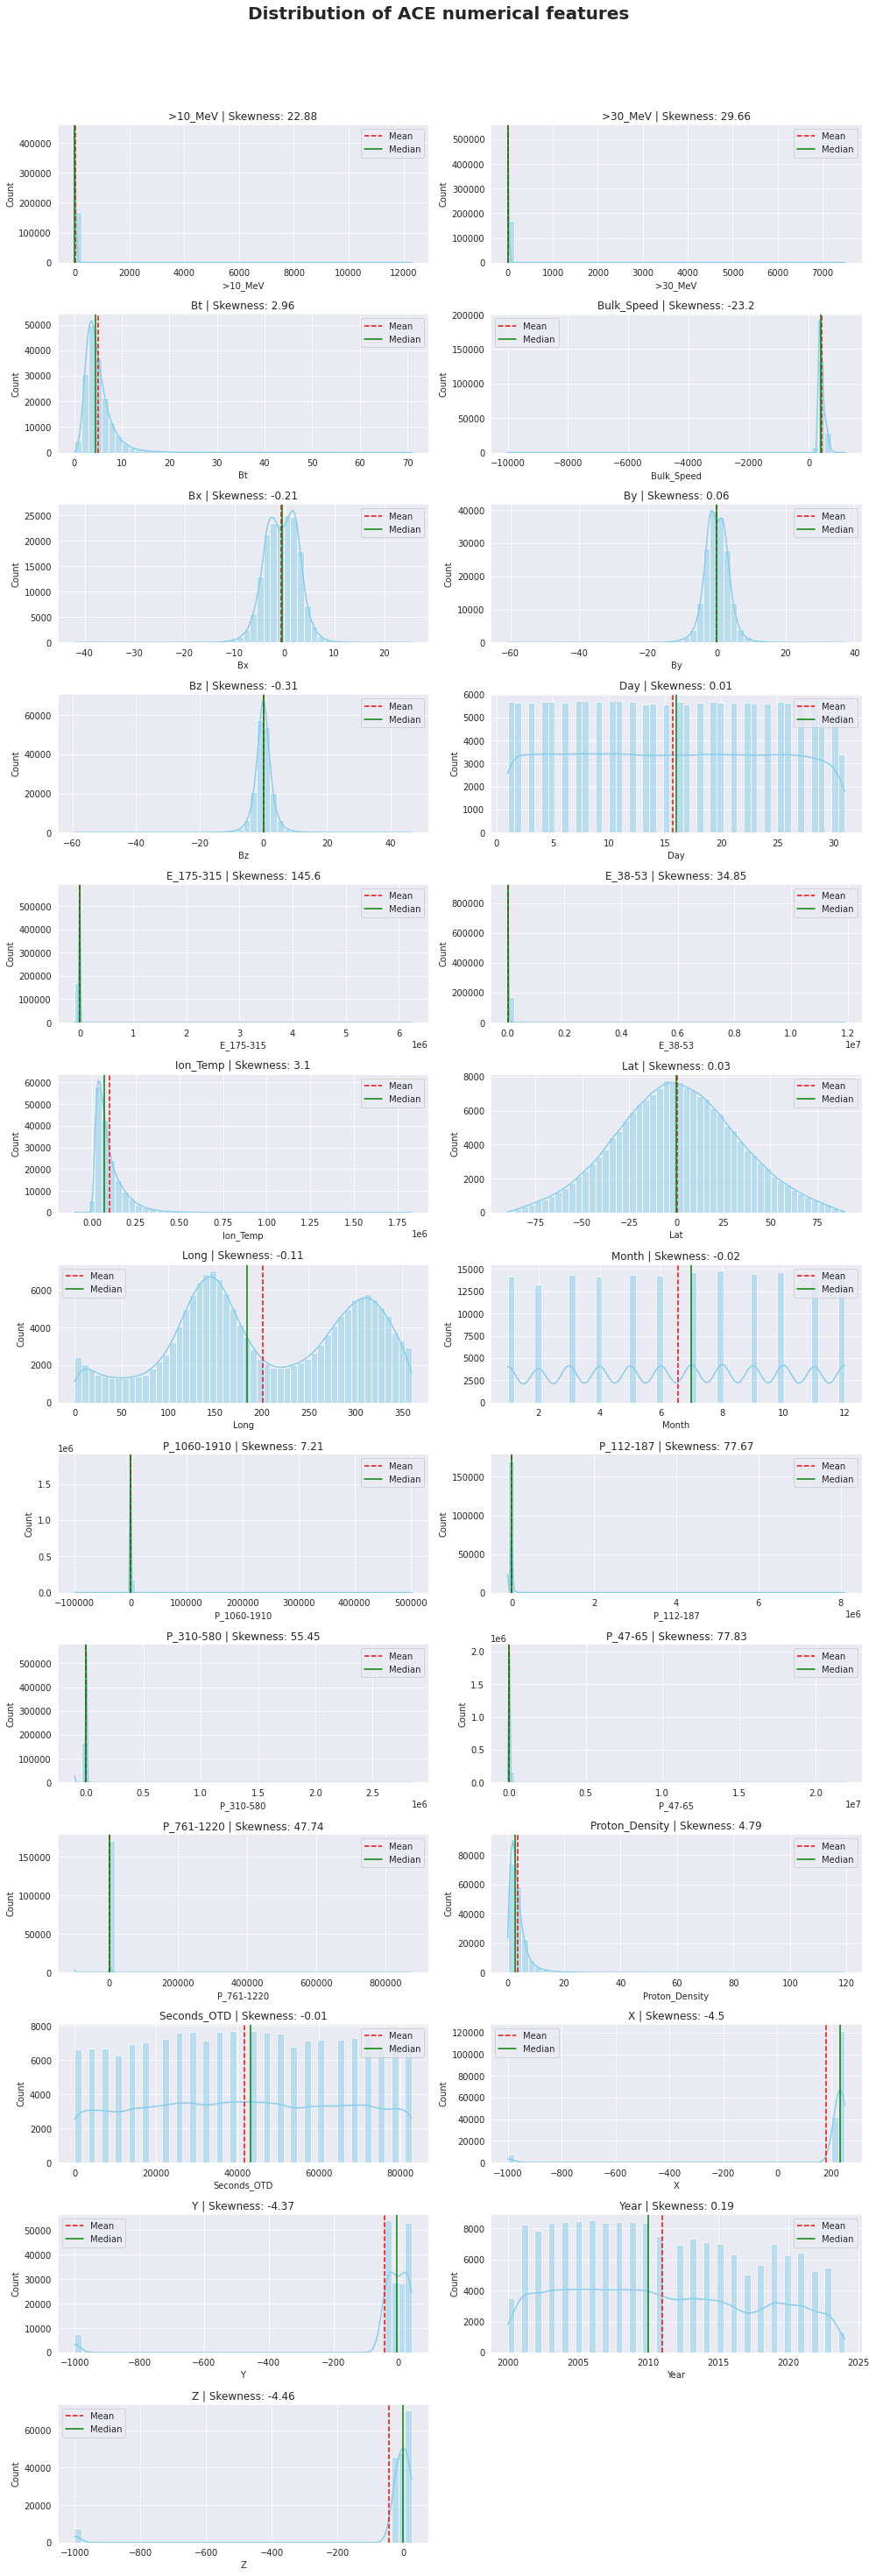

In [19]:
# Plot distribution of each numerical feature
fig = plt.figure(figsize=(14, len(ACE_NUMERICAL_COLUMNS) * 3))
for idx, feature in enumerate(np.sort(ACE_NUMERICAL_COLUMNS), 1):
    plt.subplot(len(ACE_NUMERICAL_COLUMNS), 2, idx)
    sns.histplot(master_clean[feature], kde=True, bins=50, color="skyblue")

    # Add lines for mean and median
    plt.axvline(master_clean[feature].mean(), color='r', linestyle='--',label='Mean')
    plt.axvline(master_clean[feature].median(), color='g', linestyle='-',label='Median')

    plt.title(f"{feature} | Skewness: {round(master_clean[feature].skew(), 2)}")
    plt.legend()  # Add a legend

# Adjust layout and show plots
plt.tight_layout()
fig.suptitle("Distribution of ACE numerical features", fontsize=20, weight='bold', y=1.02)
plt.show()

## Bivariate Analysis

<Figure size 720x432 with 0 Axes>

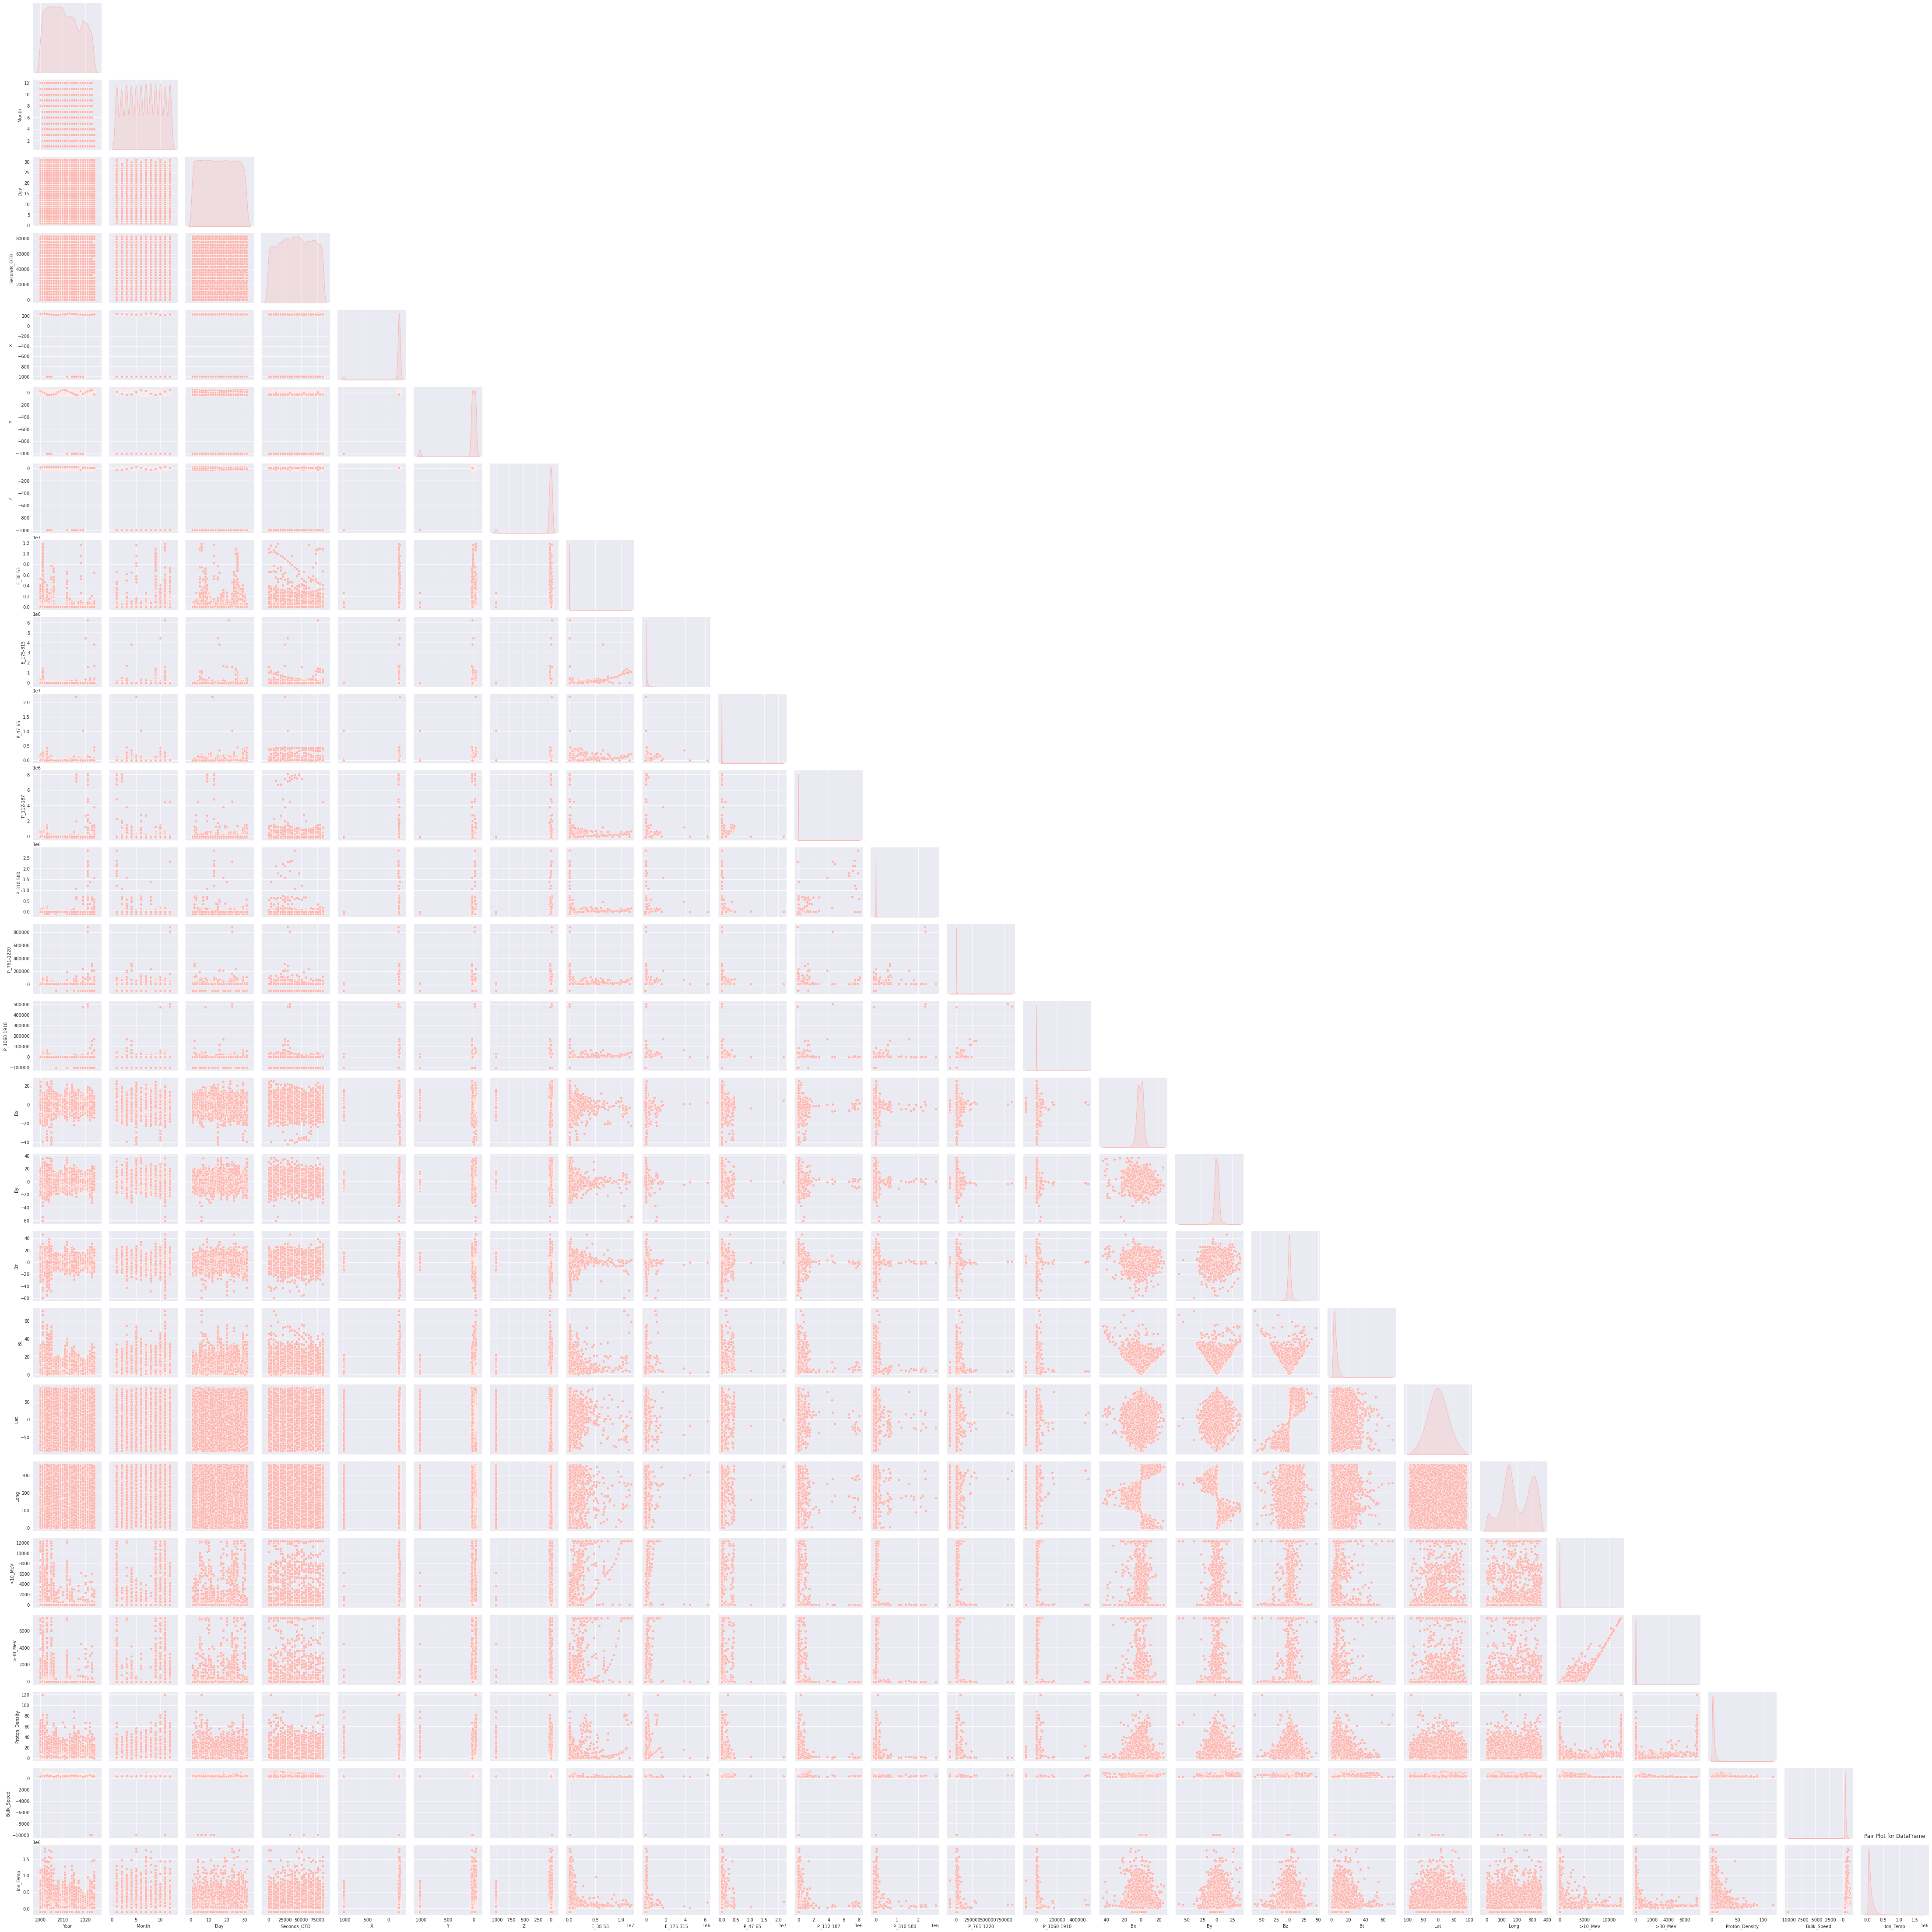

In [20]:
plt.figure(figsize=(10, 6))

# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(master_clean[ACE_NUMERICAL_COLUMNS],corner=True, diag_kind='kde')

plt.title('Pair Plot for DataFrame')
plt.show()

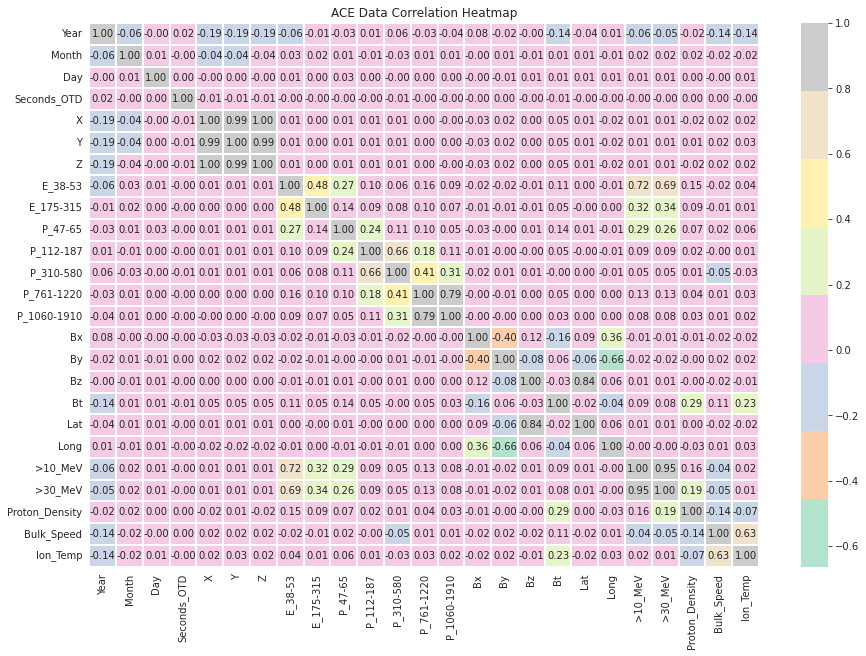

In [21]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(master_clean[ACE_NUMERICAL_COLUMNS].corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('ACE Data Correlation Heatmap')
plt.show()

Based on the correlation matrix, the following patterns were noted:

- Integral Proton Flux (>10MeV vs >30 MeV)
    - May only need one proton flux variable to include in algorithm training due to high positive correlation (0.95) if the proton flux is high at >10MeV it is highly likely it will also be high for the integral calculated at >30MeV.
- GSM Coordinates (Bx,By,Bz,Bt,Long,Lat)
    - In an attempt to reduce including confounding variables in algorithm, we may not need Longitude and Latitude coordinates as it relates to the position of activity located from Earth, while the "B" variables explicitly describe the amplitude and direction of magnetic activity occurring in the Sun's Magnetic Field in addition to locational coordinates.
- GSE Coordinates (X,Y,Z)
    - These coordinates are the predicted satellite locations based on location coordinates on Earth. Does not appear to have a strong relationship with key features of interest. So we can be sure the data captured is not heavily influenced by the satellite location. It is safe to drop these features during algorithm training as it only describes satellite location, and does not directly measure Solar Wind properties.

### Heliospheric Current Sheet Indexes - University of Michigan Climate & Space Sciences and Engineering, Liang Zhao, PD

The heliospheric current sheet (HCS) is a surface separating regions of the heliosphere where the interplanetary magnetic field points toward and away from the sun. An electrical current flows within this surface, forming a current sheet confined to this surface. The shape of the current sheet results from the influence of the Sun's rotating magnetic field on the plasma in the interplanetary medium. 

It can be very challenging to evaluate activity occuring within the HCS. Dr. Liang Zhao, a research professor at the University of Michigan, introduces two novel parameters that evaluate the global complexity of the Sun's magnetic field and tracking of the solar cycle:

- SD Index: The standard deviation of the latitude of the HCS
  
- SL Index: Integrated slope of the HCS


HCS SL and SD index was provided by Dr. Liang Zhao. Monthly average sunspot number dating back to 1749 can be found on the [Solar Influences Data Analysis Center](https://www.sidc.be/SILSO/infosnmtot) website. 

#### Why does this matter?

Solar activity like sunspots can be used to help predict space weather, the state of the ionosphere, and conditions relevant radio and satellite communications.

The sunspot cycle is a near 11-year change in the Sun's activity measured in terms of variations in the number of observed sunspots on the Sun's surface. Sunspots are temporary, dark spots on the sun's surface caused by concentrations of magnetic flux that inhibit convection. Sunspots typically appear in the active latitude regions close to the Sun's equator. 


For more information on SD and SL index calculations, please read the PowerPoint README file in the GitHub Repo. 

In [8]:
#importing HCS data as dataframe

index_data = pd.read_csv("/data/workspace_files/HCS_Data/HCS_parameters_update_CR2257.txt", engine='python',header= 0, sep=",|\s+" )
sunspot_data = pd.read_csv("/data/workspace_files/HCS_Data/SN_m_tot_V2.0.csv", skiprows=2714, sep=';',header=0, names= ['year','month', 'fyear_CS', 'avg_spNum','sd_spNum', 'num_obvs', 'definitve_marker'] )

For this project, we are directed to only use fractional year (fyear_CS), SD Index (SD_70), SL Index (SL_70), and monthly average sunspot number (avg_spNum). However, we will quickly look to see if there are patterns with the data outside of our scope.

In [9]:
index_data.describe()

,cr_temp,fyear_CS,sddv_CS,SD_70,SD_70_north,SD_70_south,slop_CS,SL_70,SL_70_north,SL_70_south,ave_slop_CS,HCS_area
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,596.000000
mean,1949.500000,1999.401552,13.443172,13.069014,12.443054,12.942022,395.372919,389.992815,211.950206,150.744176,2.691969,886.252966
std,177.968162,13.289828,6.086021,5.587241,6.114018,5.831173,724.404814,716.791825,493.842421,314.712774,4.431123,1326.617525
min,1642.000000,1976.439331,1.841347,1.841347,1.345982,1.344595,7.089793,7.089793,2.758448,2.867834,0.089744,148.888626
25%,1795.750000,1987.920990,8.206198,8.206198,7.056436,8.257072,47.375711,47.375711,20.285056,23.901317,0.457463,448.658364
50%,1949.500000,1999.402527,12.976606,12.976606,12.241110,12.911891,161.837066,161.837066,67.132710,65.584690,1.245355,584.331970
75%,2103.250000,2010.882935,18.792511,18.379632,18.155626,18.049276,456.660309,454.493645,201.065273,170.992901,3.176744,719.399856
max,2257.000000,2022.364380,25.508272,22.579355,25.071970,24.830502,8278.967773,8274.589844,7159.270508,5260.224121,44.751179,9568.851563


In [10]:
sunspot_data.describe()

,year,month,fyear_CS,avg_spNum,sd_spNum,num_obvs,definitve_marker
count,588.00000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,1999.25000,6.500000,1999.747918,83.256973,6.655612,569.768707,0.989796
std,14.16081,3.454992,14.156955,70.822892,4.237854,317.957688,0.100584
min,1975.00000,1.000000,1975.288000,0.000000,0.100000,28.000000,0.000000
25%,1987.00000,3.750000,1987.517250,20.800000,3.500000,424.500000,1.000000
50%,1999.00000,6.500000,1999.748500,65.800000,5.700000,548.500000,1.000000
75%,2011.25000,9.250000,2011.979000,131.700000,9.300000,679.000000,1.000000
max,2024.00000,12.000000,2024.206000,284.500000,29.400000,1587.000000,1.000000


In [11]:
from lets_plot import * 
ggplot()
from lets_plot.bistro import corr
corr.corr_plot(index_data).tiles().build() + ggsize(500, 370) + \
ggtitle("HCS Index Data Correlation Matrix") 

In [12]:
from lets_plot import * 
ggplot()
from lets_plot.bistro import corr
corr.corr_plot(sunspot_data).tiles().build() + ggsize(500, 370) + \
ggtitle("Total Monthly Sunspot Number Correlation Matrix") 

In [13]:
from lets_plot import * 
ggplot() + \
geom_point(aes(x="fyear_CS", y="SD_70"), data=index_data, sampling="none", color="#1100FF") + \
geom_point(aes(x="fyear_CS", y="SL_70"), data=index_data, sampling="none", color="#ff8800") + \
ggtitle("SD and SL Index vs. Fractional Year")  +\
 scale_y_log10()

In [20]:
from lets_plot import * 
ggplot() + \
geom_point(aes(x="fyear_CS", y="SD_70"), data=index_data, sampling="none", color="#1100FF") + \
geom_point(aes(x="fyear_CS", y="SL_70"), data=index_data, sampling="none", color="#ff8800") + \
ggtitle("SD and SL Index vs. Fractional Year") +\
scale_y_log10()

In [21]:
from lets_plot import * 
ggplot() + \
geom_point(aes(x="fyear_CS", y="avg_spNum"), data=sunspot_data, sampling="none" if sunspot_data.size < 2500 else sampling_systematic(n=2500)) + \
ggtitle("Monthly Total Average Sunspot Number vs. Fractional Year") 